In [504]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import mplcursors
import seaborn as sns

In [505]:
df = pd.read_csv("spotify_data.csv")

In [506]:
#Snapshot of dataset
df.head(6)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.666,98.017,4,acoustic


In [507]:
#Remove unnamed column
df = df.drop(df.columns[0], axis=1)

In [508]:
#How many unique track names?
tracks_unique = df["track_name"].unique()
len(tracks_unique)

73609

In [509]:
#How many tracks in total?
len(df["track_name"])

114000

There are more entries in the "track_name" column than there are unique track names, suggesting there are duplicates. As tracks by different artists can have the same name, I want to remove any rows where both the track name and artist are duplicates 

In [510]:
df = df.drop_duplicates(subset = ["track_name", "artists"])

In [511]:
#How many tracks are left after duplicates removed?
tracks_no_dup = len(df["track_name"])
tracks_no_dup

81344

32,656 duplicate rows were removed. How many tracks per artist are left?

In [512]:
artists_unique = len(df["artists"].unique())
artists_unique

31438

In [513]:
tracks_no_dup/artists_unique

2.587441949233412

In [514]:
#Which artists have more than one track?
vc_artists = df.artists.value_counts()

print(vc_artists[vc_artists > 1])

artists
George Jones                         215
my little airport                    163
The Beatles                          149
Håkan Hellström                      122
Scooter                              116
                                    ... 
Above & Beyond;Zoë Johnston;A.M.R      2
Thee Commons                           2
Midland                                2
a crowd of rebellion                   2
Hiérophante                            2
Name: count, Length: 10232, dtype: int64


In [515]:
#What percentage of artists have more than one track?
len(vc_artists[vc_artists > 1])/artists_unique*100

32.5465996564667

It is clear from the above that this dataset contains only an average of 2.59 tracks per artist. 10232 artists have more than one track in the dataset, which is only 32.55% of featured artists. This means the majority of artists only have one track in the dataset, which means it is not a good source to compare different artists' discographies. Rather, we can determine if any meaningful insights can be drawn from the data collected on each track. 

In [516]:
#Add duration in minutes for readability
df["duration_mins"] = df["duration_ms"].apply(lambda x: x/60000)

In [517]:
#Descriptive statstics
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
count,81344.000000,8.134400e+04,81344.000000,81344.000000,81344.000000,81344.000000,81344.000000,81344.000000,81344.000000,81344.000000,81344.000000,81344.000000,81344.000000,81344.000000,81344.000000
mean,34.635966,2.314117e+05,0.559275,0.635025,5.285922,-8.593940,0.632339,0.088992,0.329670,0.184731,0.219721,0.463280,122.145034,3.896968,3.856861
std,19.438777,1.164945e+05,0.177746,0.258639,3.557612,5.304765,0.482171,0.116628,0.339961,0.331591,0.198271,0.263383,30.128881,0.456396,1.941575
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.738710e+05,0.446000,0.455000,2.000000,-10.451250,0.000000,0.036100,0.015900,0.000000,0.098500,0.241000,99.408000,4.000000,2.897850
50%,35.000000,2.152040e+05,0.573000,0.678000,5.000000,-7.262000,1.000000,0.049100,0.190000,0.000089,0.133000,0.449000,122.030000,4.000000,3.586733
75%,49.000000,2.673460e+05,0.690000,0.857000,8.000000,-5.140000,1.000000,0.087000,0.629000,0.153000,0.283000,0.676000,140.128250,4.000000,4.455767
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,87.288250


In [518]:
# Drop categorical variables from dataset for correlational analysis. 
# Also drop duration in miliseconds as will be using duration in minutes for readability
df_numeric = df.drop(["track_id", "artists", "album_name", "track_name", "explicit", "track_genre", "duration_ms"], axis=1)
df_numeric.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
0,73,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,3.844433
1,55,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,2.493500
2,57,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,3.513767
3,71,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,3.365550
4,82,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,3.314217


In [519]:
#Calculate correlations
corr = df_numeric.corr()
corr

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
popularity,1.000000,0.087250,-0.000866,0.004416,0.090164,-0.004898,-0.064906,-0.032165,-0.174493,-0.028957,0.011300,0.001879,0.038553,-0.053275
danceability,0.087250,1.000000,0.134654,0.032581,0.264934,-0.059293,0.108295,-0.167832,-0.191532,-0.132780,0.492125,-0.015472,0.206449,-0.060155
energy,-0.000866,0.134654,1.000000,0.042776,0.761042,-0.069531,0.139823,-0.731105,-0.186444,0.190932,0.253948,0.260838,0.181096,0.058398
key,0.004416,0.032581,0.042776,1.000000,0.033893,-0.145025,0.013292,-0.041842,-0.003637,-0.002779,0.023820,0.005691,0.014994,0.011653
loudness,0.090164,0.264934,0.761042,0.033893,1.000000,-0.035461,0.054019,-0.582130,-0.434391,0.080271,0.289947,0.234031,0.193657,0.002404
mode,-0.004898,-0.059293,-0.069531,-0.145025,-0.035461,1.000000,-0.035563,0.084125,-0.050487,0.018178,0.024332,-0.001612,-0.023204,-0.035615
speechiness,-0.064906,0.108295,0.139823,0.013292,0.054019,-0.035563,1.000000,0.012313,-0.106996,0.231627,0.035071,-0.003209,-0.011022,-0.063681
acousticness,-0.032165,-0.167832,-0.731105,-0.041842,-0.582130,0.084125,0.012313,1.000000,0.095250,-0.016364,-0.101691,-0.223589,-0.173606,-0.106298
instrumentalness,-0.174493,-0.191532,-0.186444,-0.003637,-0.434391,-0.050487,-0.106996,0.095250,1.000000,-0.096608,-0.332379,-0.058948,-0.083337,0.109770
liveness,-0.028957,-0.132780,0.190932,-0.002779,0.080271,0.018178,0.231627,-0.016364,-0.096608,1.000000,0.014416,-0.008846,-0.031847,0.005619


<Axes: >

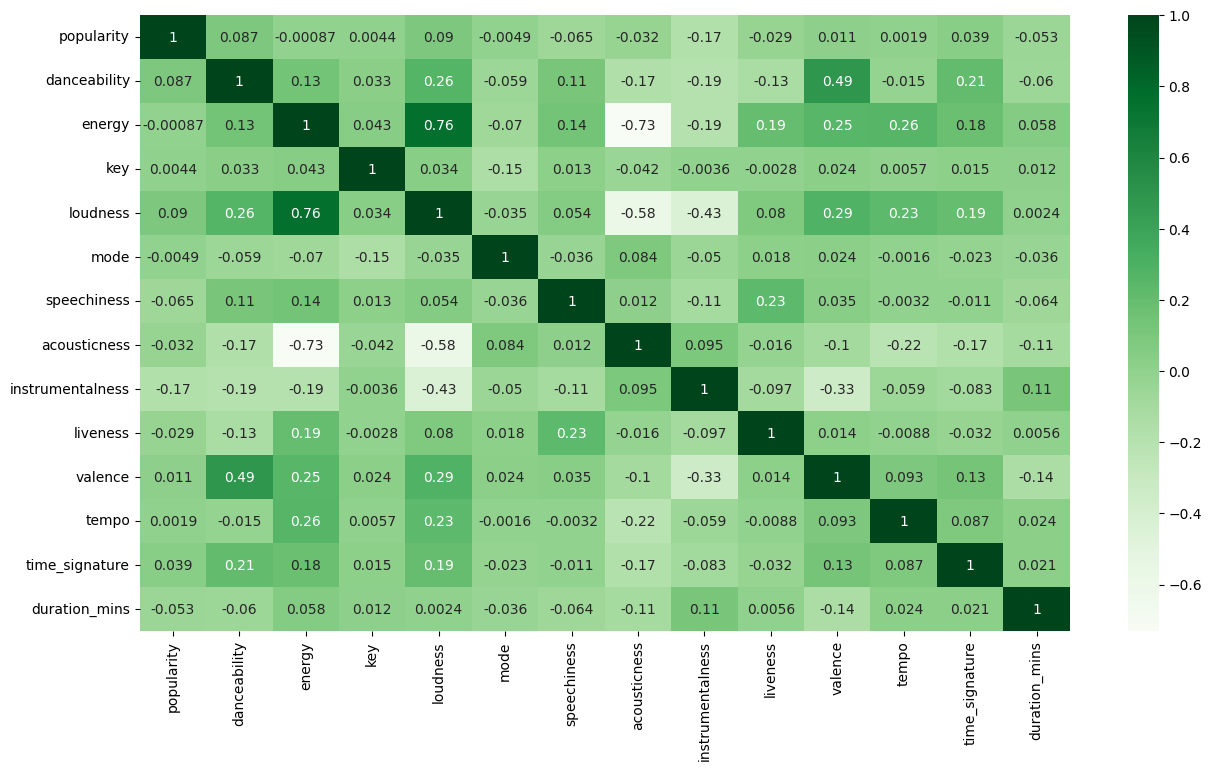

In [520]:
# Create heatmap to visualise correlations
plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap = "Greens", annot = True)

The strongest positive correlations are:<br>
>* Energy and loudness<br>
>* Danceability and valence<br>

The strongest negative correlations are:<br>
>* Energy and acousticness<br>
>* Loudness and acousticness<br>
>* Loudnesss and instrumentalness <br>
>* Valence and instrumentalness<br>

It is not evident from the correlation matrix whether these correlations are statistically significant. To determine this, p-values are calculated below.<br>
<br>
Interestingly, there are no strong correlates with popularity. This suggests that the popularity of a track is determined by other factors, or a combination of factors. 

In [521]:
#Testing correlations for statistical significance 
from scipy.stats import pearsonr

In [522]:
#Create arrays for each variable needed for testing
energy = np.array(df["energy"])
acousticness = np.array(df["acousticness"])
danceability = np.array(df["danceability"])
loudness = np.array(df["loudness"])
instrumentalness = np.array(df["instrumentalness"])
valence = np.array(df["valence"]) 

In [523]:
#Compute pearson's r and p-value for each pair
p_values = {"Energy and loudness": pearsonr(energy, loudness), 
            "Danceability and Valence": pearsonr(danceability, valence), 
            "Energy and Acousticness": pearsonr(energy, acousticness),
            "Loudness and Acousticness": pearsonr(loudness, acousticness),
            "Loudness and Instrumentalness": pearsonr(loudness, instrumentalness),
            "Valence and Instrumentalness": pearsonr(valence, instrumentalness)}
p_values


{'Energy and loudness': PearsonRResult(statistic=0.7610419152450938, pvalue=0.0),
 'Danceability and Valence': PearsonRResult(statistic=0.4921246479632961, pvalue=0.0),
 'Energy and Acousticness': PearsonRResult(statistic=-0.7311054812841001, pvalue=0.0),
 'Loudness and Acousticness': PearsonRResult(statistic=-0.5821304685523565, pvalue=0.0),
 'Loudness and Instrumentalness': PearsonRResult(statistic=-0.43439071192585044, pvalue=0.0),
 'Valence and Instrumentalness': PearsonRResult(statistic=-0.3323793728954789, pvalue=0.0)}

As all the above correlations are statistically significant (p-value < .001), it is evident that:<br><br>

Energetic music is more likely to be loud<br>
Energetic music is less likely to be acoustic <br>
Acoustic music is less likely to be loud<br>
Instrumental music is less likely to be loud<br>
Instrumental music is less likely to sound positive (e.g., happy, cheerful, euophoric)<br>
Positive sounding music is more likely to be danceable

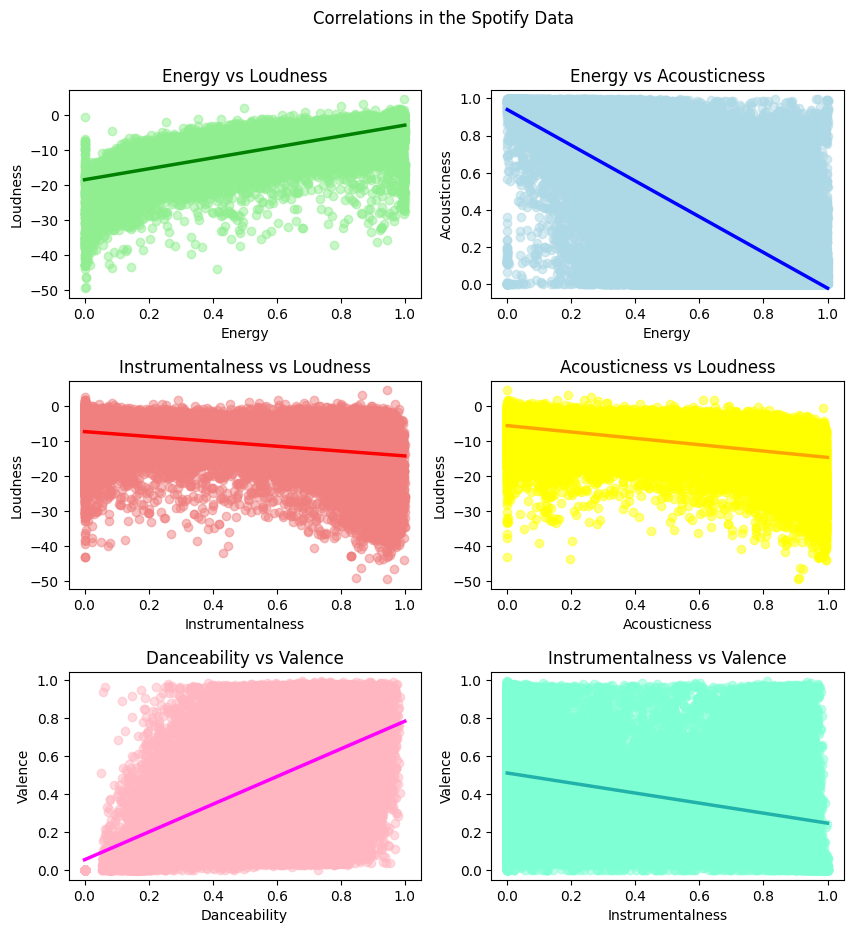

In [524]:
#Plotting multiple correlation plots on one figure- https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)

fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle("Correlations in the Spotify Data")

fig.subplots_adjust(left=None, bottom=None, right=None, top=.9, wspace=.2, hspace=.4)

#Energy and Loudness
ax1.scatter(energy, loudness, c = "lightgreen", alpha = .5)
ax1.set_title("Energy vs Loudness")
ax1.set_xlabel("Energy")
ax1.set_ylabel("Loudness")

#Regression line- https://python-graph-gallery.com/scatterplot-with-regression-fit-in-matplotlib/
b, a = np.polyfit(energy, loudness, deg=1)
xseq = np.linspace(0, 1, num=10)

# Plot regression line
ax1.plot(xseq, a + b * xseq, color="g", lw=2.5)

#Energy and acousticness
ax2.scatter(energy, acousticness, c = "lightblue", alpha = .5)
ax2.set_title("Energy vs Acousticness")
ax2.set_xlabel("Energy")
ax2.set_ylabel("Acousticness")

#Regression line
b, a = np.polyfit(energy, acousticness, deg=1)
xseq = np.linspace(0, 1, num=10)

# Plot regression line
ax2.plot(xseq, a + b * xseq, color="b", lw=2.5)

#Instrumentalness and loudness
ax3.scatter(instrumentalness, loudness, c = "lightcoral", alpha = .5)
ax3.set_title("Instrumentalness vs Loudness")
ax3.set_xlabel("Instrumentalness")
ax3.set_ylabel("Loudness")

#Regression line
b, a = np.polyfit(instrumentalness, loudness, deg=1)
xseq = np.linspace(0, 1, num=10)

# Plot regression line
ax3.plot(xseq, a + b * xseq, color="r", lw=2.5)

#Acousticness and loudness
ax4.scatter(acousticness, loudness, c = "yellow", alpha = .5)
ax4.set_title("Acousticness vs Loudness")
ax4.set_xlabel("Acousticness")
ax4.set_ylabel("Loudness")

#Regression line
b, a = np.polyfit(acousticness, loudness, deg=1)
xseq = np.linspace(0, 1, num=10)

# Plot regression line
ax4.plot(xseq, a + b * xseq, color="orange", lw=2.5)

#Danceability and Valence
ax5.scatter(danceability, valence, c = "lightpink", alpha = .5)
ax5.set_title("Danceability vs Valence")
ax5.set_xlabel("Danceability")
ax5.set_ylabel("Valence")

#Regression line
b, a = np.polyfit(danceability, valence, deg=1)
xseq = np.linspace(0, 1, num=10)

# Plot regression line
ax5.plot(xseq, a + b * xseq, color="fuchsia", lw=2.5)

#Instrumentalness and Valence
ax6.scatter(instrumentalness, valence, c = "aquamarine", alpha = .5)
ax6.set_title("Instrumentalness vs Valence")
ax6.set_xlabel("Instrumentalness")
ax6.set_ylabel("Valence")

#Regression line
b, a = np.polyfit(instrumentalness, valence, deg=1)
xseq = np.linspace(0, 1, num=10)

# Plot regression line
ax6.plot(xseq, a + b * xseq, color="lightseagreen", lw=2.5)
plt.show()

Tracks are defined as either explicit or non-explicit, depending on whether they contain any explicit lyrics. I will investigate whether explicit and non-explicit tracks differ on any of the scale variables contained in the dataset

In [525]:
# Create separate dataframes for explicit and non-explicit tracks
group1 = df[(df["explicit"]==True)]
group2 = df[(df["explicit"]==False)]

In [526]:
# How many tracks in each group?
explicit_len = len(group1["track_name"])
nonexplicit_len = len(group2["track_name"])

print(f"Explicit: {explicit_len} \nNon-explicit: {nonexplicit_len}")

Explicit: 6958 
Non-explicit: 74386


The vast majority of tracks are not explicit. There are also unequal sample sizes, which should be taken into consideration when choosing analyses

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'duration_mins'}>, <Axes: >]],
      dtype=object)

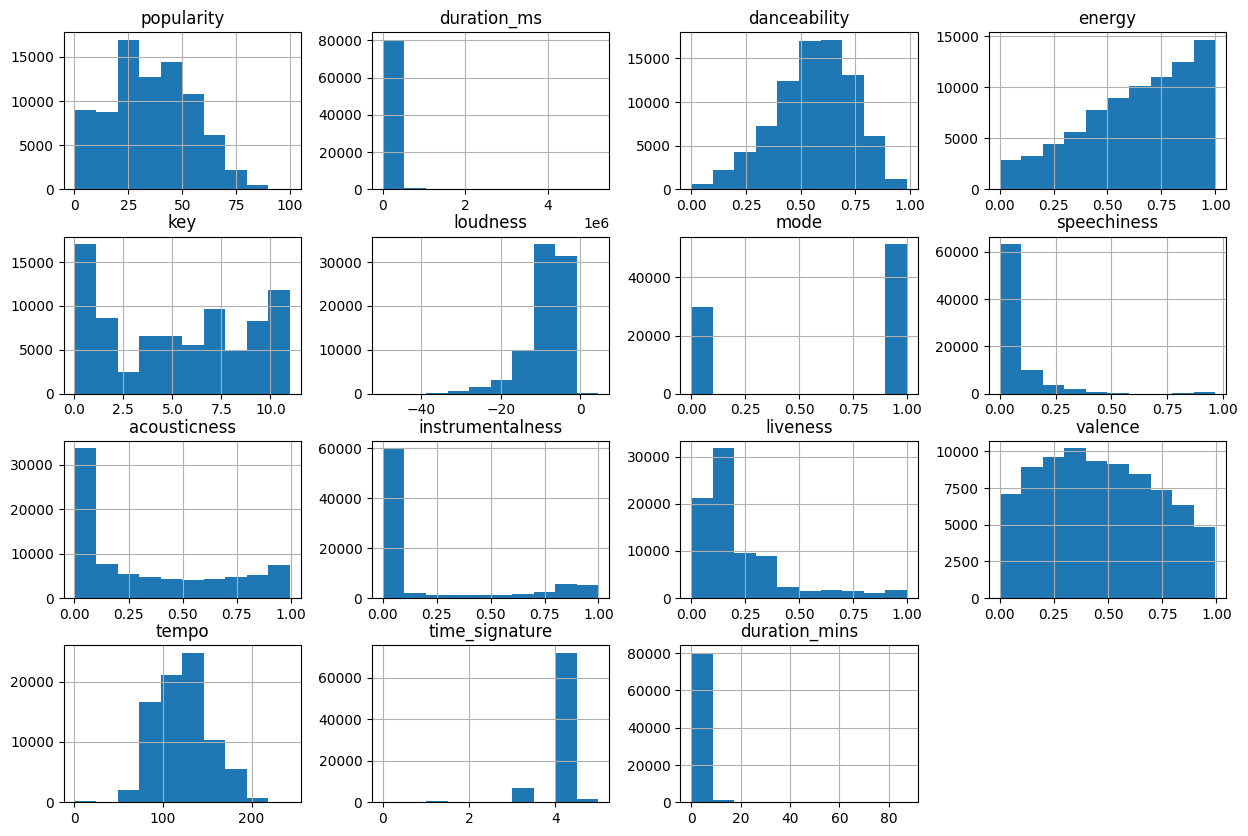

In [527]:
#Testing normality of data
df.hist(figsize=(15,10))

The data appear to not be normally distributed. <br>
Valence, tempo and danceability look close to a normal distribution, so will be further tested by the normaltest from scipy.stats

In [528]:
from scipy.stats import normaltest

In [529]:
normal = pd.DataFrame({"Danceability" : normaltest(df["danceability"]),"Valence": normaltest(df["valence"]), "Tempo": normaltest(df["tempo"])})
normal

,Danceability,Valence,Tempo
0,2119.073862,24318.747965,3.937962e+02
1,0.000000,0.000000,3.077825e-86


As p-values are <.001, the data are not normally distributed. Therefore, to compare explicit and non-explicit tracks on each scale variable, the Mann-Whitney U Test should be performed as it does not assume a normal distribution or equality of variances. It also allows for unequal sample sizes, as is present in this case (just 6,958 explicit tracks compared to 74,386 non-explicit tracks)

In [530]:
from scipy.stats import mannwhitneyu 

In [531]:
#Running Mann-Whitney U Test to compare explicit and non-explicit songs across all scale variables 
#Aadapted t-test method here: https://stackoverflow.com/questions/77568379/how-to-run-t-test-on-multiple-pandas-columns

cols = df.columns.difference(["explicit", "track_id", "artists", "album_name", "track_name", "key", "duration_ms", "mode", "track_genre", "time_signature"])

out = pd.DataFrame(mannwhitneyu(group1[cols], group2[cols]),
                   columns=cols, index=['statistic', 'pvalue'])
out


,acousticness,danceability,duration_mins,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
statistic,2.183624e+08,3.170712e+08,2.077133e+08,3.074112e+08,187676786.0,2.823415e+08,3.160256e+08,2.892386e+08,404517298.0,2.536395e+08,2.606173e+08
pvalue,2.617010e-103,1.492983e-212,1.021652e-163,1.472559e-148,0.0,2.928359e-36,4.549964e-205,1.875598e-59,0.0,5.975782e-03,3.290051e-01


From the above results, there is a significant difference between explicit and non-explicit tracks on all measures, except tempo and valence, indicated by low p-values (<.001). 

https://blog.minitab.com/en/adventures-in-statistics-2/understanding-t-tests-t-values-and-t-distributions

In [532]:
# Grouped descriptive statstics to further understand the differences between explicit and non-explicit tracks
df_grouped = df.groupby("explicit")

grouped_descr = df_grouped[cols].describe()

pd.options.display.max_columns = None

grouped_descr


acousticness                                                          \
                count      mean       std  min       25%    50%    75%    max   
explicit                                                                        
False         74386.0  0.338372  0.343849  0.0  0.016800  0.203  0.649  0.996   
True           6958.0  0.236642  0.278747  0.0  0.008428  0.107  0.397  0.995   

         danceability                                                     \
                count      mean       std     min    25%    50%      75%   
explicit                                                                   
False         74386.0  0.553247  0.176670  0.0000  0.441  0.568  0.68300   
True           6958.0  0.623713  0.176449  0.0614  0.509  0.640  0.75975   

                duration_mins                                          \
            max         count      mean       std       min       25%   
explicit                                                                
False     0.985       74386.0  3.896459  1.969189  0.000000  2.925271   
True      0.980        6958.0  3.433533  1.555497  0.519767  2.663650   

                                         energy                              \
               50%       75%       max    count      mean       std     min   
explicit                                                                      
False     3.625000  4.501537  87.28825  74386.0  0.626979  0.262592  0.0000   
True      3.234183  3.916233  70.77010   6958.0  0.721043  0.191786  0.0423   

                                   instrumentalness                          \
            25%    50%    75%  max            count      mean      std  min   
explicit                                                                      
False     0.441  0.671  0.853  1.0          74386.0  0.196524  0.33967  0.0   
True      0.580  0.729  0.892  1.0           6958.0  0.058659  0.18601  0.0   

                                         liveness                              \
          25%       50%       75%    max    count      mean       std     min   
explicit                                                                        
False     0.0  0.000139  0.226000  1.000  74386.0  0.216963  0.195977  0.0000   
True      0.0  0.000001  0.000715  0.995   6958.0  0.249212  0.219174  0.0196   

                                      loudness                              \
             25%    50%    75%    max    count      mean       std     min   
explicit                                                                     
False     0.0981  0.131  0.278  1.000  74386.0 -8.767659  5.422537 -49.531   
True      0.1040  0.152  0.326  0.992   6958.0 -6.736770  3.296075 -24.843   

                                         popularity                        \
               25%    50%     75%    max      count       mean        std   
explicit                                                                    
False    -10.67200 -7.395 -5.2140  4.532    74386.0  34.256836  19.255466   
True      -8.31625 -6.137 -4.5365  1.821     6958.0  38.689135  20.875658   

                                       speechiness                      \
          min   25%   50%   75%    max       count      mean       std   
explicit                                                                 
False     0.0  21.0  34.0  48.0  100.0     74386.0  0.076956  0.090102   
True      0.0  23.0  39.0  55.0   98.0      6958.0  0.217672  0.232651   

                                                      tempo              \
             min       25%     50%      75%    max    count        mean   
explicit                                                                  
False     0.0000  0.035400  0.0471  0.07730  0.963  74386.0  122.198405   
True      0.0232  0.063225  0.1290  0.27875  0.965   6958.0  121.574463   

                                                                     valence  \
                std     min       25%       50%       

Explicit tracks score lower on acousticness, instrumentalness than non-explicit tracks. They also scored lower on tempo, and valence but the differences are small and not statistically significant.<br>
Explicit tracks score higher on danceability, energy, liveness, loudness, popularity, speechiness<br>
Explicit tracks are generally shorter than non-explicit tracks <br><br>

This is visualised in the figure below

In [533]:
#Importing standard error of the mean for barplots
#This is an indication of the reliability of the mean. A small SE is an indication that the sample mean is a more accurate reflection of the actual population mean. A larger sample size will normally result in a smaller SE (while SD is not directly affected by sample size)
##https://www.greenbook.org/insights/research-methodologies/how-to-interpret-standard-deviation-and-standard-error-in-survey-research.
from scipy.stats import sem

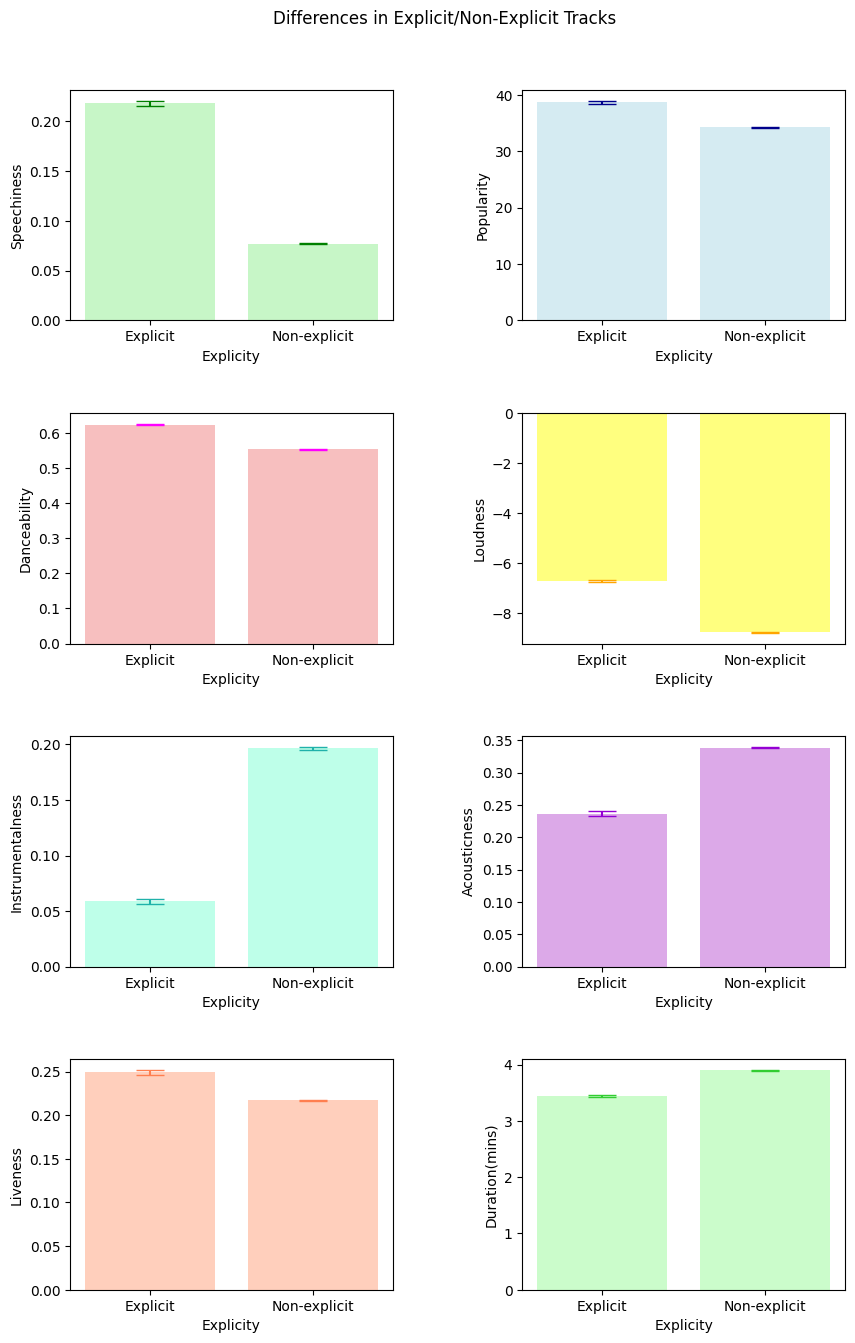

In [534]:
#Define means and SDs for each variable, grouped by explicity

ex_speechiness_mean = group1["speechiness"].mean()
nonex_speechiness_mean = group2["speechiness"].mean()

ex_speechiness_std = group1["speechiness"].sem()
nonex_speechiness_std = group2["speechiness"].sem()

ex_danceability_mean = group1["danceability"].mean()
nonex_danceability_mean = group2["danceability"].mean()

ex_danceability_std = group1["danceability"].sem()
nonex_danceability_std = group2["danceability"].sem()

ex_acousticness_mean = group1["acousticness"].mean()
nonex_acousticness_mean = group2["acousticness"].mean()

ex_acousticness_std = group1["acousticness"].sem()
nonex_acousticness_std = group2["acousticness"].sem()

ex_instrumentalness_mean = group1["instrumentalness"].mean()
nonex_instrumentalness_mean = group2["instrumentalness"].mean()

ex_instrumentalness_std = group1["instrumentalness"].sem()
nonex_instrumentalness_std = group2["instrumentalness"].sem()

ex_loudness_mean = group1["loudness"].mean()
nonex_loudness_mean = group2["loudness"].mean()

ex_loudness_std = group1["loudness"].sem()
nonex_loudness_std = group2["loudness"].sem()

ex_energy_mean = group1["energy"].mean()
nonex_energy_mean = group2["energy"].mean()

ex_energy_std = group1["energy"].sem()
nonex_energy_std = group2["energy"].sem()

ex_liveness_mean = group1["liveness"].mean()
nonex_liveness_mean = group2["liveness"].mean()

ex_liveness_std = group1["liveness"].sem()
nonex_liveness_std = group2["liveness"].sem()

ex_popularity_mean = group1["popularity"].mean()
nonex_popularity_mean = group2["popularity"].mean()

ex_popularity_std = group1["popularity"].sem()
nonex_popularity_std = group2["popularity"].sem()

ex_duration_mean = group1["duration_mins"].mean()
nonex_duration_mean = group2["duration_mins"].mean()

ex_duration_std = group1["duration_mins"].sem()
nonex_duration_std = group2["duration_mins"].sem()

#Define x labels and coordinates for barplot
explicit_or_not = ['Explicit', 'Non-explicit']
x_pos = np.arange(len(explicit_or_not))

#group means and standard errors for use in barplot
speechiness_means = [ex_speechiness_mean, nonex_speechiness_mean]
speechiness_error = [ex_speechiness_std, nonex_speechiness_std]

danceability_means = [ex_danceability_mean, nonex_danceability_mean]
danceability_error = [ex_danceability_std, nonex_danceability_std]

danceability_means = [ex_danceability_mean, nonex_danceability_mean]
danceability_error = [ex_danceability_std, nonex_danceability_std]

liveness_means = [ex_liveness_mean, nonex_liveness_mean]
liveness_error = [ex_liveness_std, nonex_liveness_std]

loudness_means = [ex_loudness_mean, nonex_loudness_mean]
loudness_error = [ex_loudness_std, nonex_loudness_std]

popularity_means = [ex_popularity_mean, nonex_popularity_mean]
popularity_error = [ex_popularity_std, nonex_popularity_std]

energy_means = [ex_energy_mean, nonex_energy_mean]
energy_error = [ex_energy_std, nonex_energy_std]

duration_means = [ex_duration_mean, nonex_duration_mean]
duration_error = [ex_duration_std, nonex_duration_std]

instrumentalness_means = [ex_instrumentalness_mean, nonex_instrumentalness_mean]
instrumentalness_error = [ex_instrumentalness_std, nonex_instrumentalness_std]

acousticness_means = [ex_acousticness_mean, nonex_acousticness_mean]
acousticness_error = [ex_acousticness_std, nonex_acousticness_std]

#Define figure with four rows and two columns

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2)
#Formatting figure
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle("Differences in Explicit/Non-Explicit Tracks")

fig.subplots_adjust(left=None, bottom=-.3, right=None, top=.9, wspace=.4, hspace=.4)

#1 Speechiness plot
ax1.bar(x_pos, speechiness_means, yerr=speechiness_error, align='center', alpha= 0.5, color = "lightgreen", ecolor='green', capsize=10)
ax1.set_ylabel('Speechiness')
ax1.set_xlabel('Explicity')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(explicit_or_not)

#2 Popularity plot
ax2.bar(x_pos, popularity_means, yerr=popularity_error, align='center', alpha=0.5, color = "lightblue", ecolor='darkblue', capsize=10)
ax2.set_ylabel('Popularity')
ax2.set_xlabel('Explicity')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(explicit_or_not)

#3 Danceability plot
ax3.bar(x_pos, danceability_means, yerr=danceability_error, align='center', alpha=0.5, color = "lightcoral", ecolor="magenta", capsize=10)
ax3.set_ylabel('Danceability')
ax3.set_xlabel('Explicity')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(explicit_or_not)

#4 Loudness plot
ax4.bar(x_pos, loudness_means, yerr=loudness_error, align='center', alpha=0.5, color = "yellow", ecolor='orange', capsize=10)
ax4.set_ylabel('Loudness')
ax4.set_xlabel('Explicity')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(explicit_or_not)

#5 Instrumentalness plot
ax5.bar(x_pos, instrumentalness_means, yerr=instrumentalness_error, align='center', alpha=0.5, color = "aquamarine", ecolor='lightseagreen', capsize=10)
ax5.set_ylabel('Instrumentalness')
ax5.set_xlabel('Explicity')
ax5.set_xticks(x_pos)
ax5.set_xticklabels(explicit_or_not)

#6 Acousticness plot
ax6.bar(x_pos, acousticness_means, yerr=acousticness_error, align='center', alpha=0.5, color = "mediumorchid", ecolor='darkviolet', capsize=10)
ax6.set_ylabel('Acousticness')
ax6.set_xlabel('Explicity')
ax6.set_xticks(x_pos)
ax6.set_xticklabels(explicit_or_not)

#7 Liveness plot
ax7.bar(x_pos, liveness_means, yerr=liveness_error, align='center', alpha=0.5, color = "lightsalmon", ecolor='coral', capsize=10)
ax7.set_ylabel('Liveness')
ax7.set_xlabel('Explicity')
ax7.set_xticks(x_pos)
ax7.set_xticklabels(explicit_or_not)

#8 Duration plot
ax8.bar(x_pos, duration_means, yerr=duration_error, align='center', alpha=0.5, color = "palegreen", ecolor='limegreen', capsize=10)
ax8.set_ylabel('Duration(mins)')
ax8.set_xlabel('Explicity')
ax8.set_xticks(x_pos)
ax8.set_xticklabels(explicit_or_not)

plt.show()

The narrow errors bars (standard error of the mean) above show that the sample mean is close to the estimated population mean, and the lack of overlap between error bars suggests that there is a significant difference between means, as confirmed in the Mann-Whitney U test above. 

The error bars for explicit tracks are slightly wider than for non-explicit tracks which may reflect the smaller number of explicit tracks in the sample (9,747 vs 104,253). As sample size increases, the sample mean becomes a more accurate estimate of the population mean and the standard error becomes smaller. 

https://stats.libretexts.org/Bookshelves/Applied_Statistics/Biological_Statistics_(McDonald)/03%3A_Descriptive_Statistics/3.03%3A_Standard_Error_of_the_Mean#:~:text=As%20you%20increase%20your%20sample,of%20the%20mean%20becomes%20smaller.)

Can we learn anything about genre?

In [535]:
#List of genres
genres = df["track_genre"].unique()
genres


array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [536]:
#Number of genres
len(df["track_genre"].unique())

113

In [537]:
#Descriptive statistics for popularity of each genre
df_grouped_genre = df.groupby("track_genre")

grouped_descr_genre = df_grouped_genre["popularity"].describe().sort_values("mean", ascending = False)

grouped_descr_genre = grouped_descr_genre.reset_index()

grouped_descr_genre


,track_genre,count,mean,std,min,25%,50%,75%,max
0,k-pop,855.0,59.265497,12.310899,0.0,49.0,60.0,69.0,88.0
1,pop-film,808.0,59.122525,10.775671,0.0,57.0,60.0,64.0,79.0
2,metal,213.0,56.450704,17.845079,0.0,47.0,63.0,68.0,81.0
3,pop,299.0,55.906355,30.481779,0.0,63.0,67.0,72.0,95.0
4,chill,910.0,55.145055,12.001414,0.0,52.0,57.0,61.0,93.0
...,...,...,...,...,...,...,...,...,...
108,latin,436.0,13.827982,27.713729,0.0,0.0,0.0,3.0,98.0
109,chicago-house,956.0,12.243724,9.428497,0.0,7.0,10.0,14.0,78.0
110,detroit-techno,920.0,11.151087,9.003203,0.0,6.0,8.0,12.0,58.0
111,romance,856.0,3.630841,6.663451,0.0,0.0,0.0,6.0,35.0


In [538]:
#Order by count 
grouped_descr_genre.sort_values("count", ascending=False)

,track_genre,count,mean,std,min,25%,50%,75%,max
89,study,996.0,26.152610,14.121255,0.0,11.0,28.0,37.00,55.0
98,black-metal,991.0,22.363269,9.335347,0.0,17.0,19.0,21.50,58.0
95,comedy,987.0,24.618034,7.321715,19.0,21.0,23.0,25.00,75.0
88,heavy-metal,985.0,26.208122,8.294646,0.0,21.0,23.0,29.00,62.0
90,bluegrass,978.0,25.765849,7.722369,0.0,22.0,24.0,27.00,69.0
...,...,...,...,...,...,...,...,...,...
76,rock,167.0,32.089820,37.882002,0.0,0.0,2.0,77.00,90.0
73,reggae,166.0,32.421687,29.080503,0.0,0.0,44.0,53.25,85.0
18,house,134.0,46.925373,29.617011,0.0,2.0,60.0,70.00,81.0
35,indie,107.0,42.205607,27.460688,0.0,11.0,46.0,58.50,89.0


There are 113 total genres contained in the dataset <br><br>
There is large variation in the popularity of track genres, with K-Pop scoring highest (59.27/100) and Iranian scoring the lowest (2.26/100) <br><br>
There is also large variation in how represented each genre is in the dataset, with the most represented genre (Study) having 996 tracks and the least represented (Reggaeton) having only 63.<br><br>
Popularity by genre is visualised in the plot below, which can be viewed on Github Pages: https://niallrussell.github.io/PDFA-project/ <br><br>
It is important to note that this sample is unlikely to be representative of the total population of Spotify tracks, due to the wide variance in track counts associated with each genre.

In [539]:
#Capitalize genre names for readability 
grouped_descr_genre['track_genre'] = grouped_descr_genre['track_genre'].str.capitalize()

In [540]:
import plotly.express as px
import plotly.graph_objs as go

fig = px.scatter(grouped_descr_genre, x="track_genre", y="mean", color=grouped_descr_genre.index, 
                 color_continuous_scale=px.colors.sequential.Agsunset, title="Track genre by popularity",
                 labels = {
                     "track_genre": "Track Genre",
                     "mean": "Popularity"
                 })
fig.update_traces(mode="markers+lines")
fig.update_layout(polar = dict(angularaxis = dict(showticklabels = False)))
fig.update(layout_coloraxis_showscale=False)
fig.update_xaxes(showticklabels=False)

fig.write_html("docs/index.html")
fig.show()

# To view the interactive plot, visit https://niallrussell.github.io/PDFA-project/


Can any insights be drawn on artists?

In [541]:
# How many unique artists? 
len(df["artists"].unique())

31438

In [542]:
# Sort artists by popularity 
df_by_popularity = df[["artists", "popularity"]]

popularity_artists = df_by_popularity.groupby("artists").mean().sort_values("popularity", ascending = False).reset_index()

popularity_artists.head(20)


,artists,popularity
0,Sam Smith;Kim Petras,100.0
1,Bizarrap;Quevedo,99.0
2,Manuel Turizo,98.0
3,Bad Bunny;Chencho Corleone,97.0
4,Bad Bunny;Bomba Estéreo,95.0
5,Joji,94.0
6,Beyoncé,93.0
7,Harry Styles,92.0
8,Charlie Puth;Jung Kook;BTS,92.0
9,Nicki Minaj,92.0


Curiously, Taylor Swift is not included in the top 20 most popular artists. Where is she?

In [543]:
popularity_artists[popularity_artists["artists"] == "Taylor Swift"]

,artists,popularity
9564,Taylor Swift,47.222222


Either the world has changed dramatically, or there is a flaw in the dataset. Let's investigate

In [544]:
taylor = df[df['artists'] == "Taylor Swift"]
 
print(taylor[["track_name", "popularity"]])

                                  track_name  popularity
81090  You Belong With Me (Taylor’s Version)           9
81091                                  Lover           0
81095                                 willow           0
81097                               cardigan           0
81137                            Blank Space          85
81556                                 august          86
81658                         Wildest Dreams          80
81857                         Don’t Blame Me          88
81911                             Love Story          77


Here, we can see that Taylor Swift has 9 tracks featured in the dataset, compared to an average of 2.59 per artist. Some songs score high on popularity, but some score, giving her an average of 47.22/100. The inclusion of less popular tracks may have skewed her popularity in the dataset, as well as the lack of her most popular songs such as Cruel Summer (currently over 2.7 billion streams on Spotify).

Sam Smith and Kim Petras only have one song together, Unholy, which currently has over 1.7 billion streams on Spotify. There are currently 238 tracks with more streams on Spotify: https://kworb.net/spotify/songs.html

The lack of inclusion of more popular tracks and the fact that Sam Smith and Kim Petras have only one track explains why they emerge as the most popular artist.

Let's have a look at another immensely popular artist who did make it into the top 10, Beyoncé.

In [545]:
beyonce = df[df['artists'] == "Beyoncé"]
 
print(beyonce[["track_name", "popularity"]])

      track_name  popularity
20850    CUFF IT          93


Beyoncé only has one track featured, CUFF IT, which currently has about 860 million streams on Spotify. This is her third most popular track: https://kworb.net/spotify/artist/6vWDO969PvNqNYHIOW5v0m_songs.html

Due to the lack of a full discography from each artist, it is clear that this dataset is limited in insights that can be drawn on the popularity of artists

Are there any difference between tracks performed live versus those recorded in a studio? 

In [546]:
#How many live tracks are featured? Scores of .8 or above are considered to be live recordings.
df["Live"] = [True if x >= .8 else False for x in df["liveness"]]

df["Live"].value_counts()

Live
False    78568
True      2776
Name: count, dtype: int64

In [547]:
df[["Live", "track_genre"]]

,Live,track_genre
0,False,acoustic
1,False,acoustic
2,False,acoustic
3,False,acoustic
4,False,acoustic
...,...,...
113995,False,world-music
113996,False,world-music
113997,False,world-music
113998,False,world-music


In [548]:
#Define groups for live and not live
group3 = df[(df["Live"]==True)]
group4 = df[(df["Live"]==False)]

In [549]:
#Table of counts for live and not live
live_table = pd.crosstab(index=group3["track_genre"], columns="count")
not_live_table = pd.crosstab(index=group4["track_genre"], columns="count")

In [550]:
#Merge live and not live tables 
df_live_genre = pd.concat([live_table, not_live_table], axis = 1).reset_index()
df_live_genre.columns = ["Track Genre", "Live", "Not Live"]

#Create column for percentage of live tracks
df_live_genre["Percent"] = df_live_genre["Live"]/df_live_genre["Not Live"]*100

df_live_genre = df_live_genre.dropna(axis=0, how = "any")
df_live_genre = df_live_genre.sort_values(["Percent"], ascending=False)
df_live_genre.head(20)

,Track Genre,Live,Not Live,Percent
18,comedy,376.0,611,61.538462
71,pagode,271.0,548,49.452555
88,sertanejo,170.0,633,26.856240
87,samba,122.0,488,25.000000
92,sleep,171.0,774,22.093023
68,mpb,103.0,651,15.821813
91,ska,66.0,658,10.030395
38,gospel,59.0,606,9.735974
9,brazil,73.0,855,8.538012
48,heavy-metal,74.0,911,8.122942


Only one genre (comedy) is more likely to be live than not, with Pagode (a Brazilian subgenre of salsa) being performed live in just under half of its featured tracks. 

In [551]:
cols = df.columns.difference(["Live", "liveness", "explicit", "track_id", "artists", "album_name", "track_name", "key", "duration_ms", "mode", "track_genre", "time_signature"])

out = pd.DataFrame(mannwhitneyu(group3[cols], group4[cols]),
                   columns=cols, index=['statistic', 'pvalue'])
out

,acousticness,danceability,duration_mins,energy,instrumentalness,loudness,popularity,speechiness,tempo,valence
statistic,1.245048e+08,7.991379e+07,1.186288e+08,1.391770e+08,8.511304e+07,1.081642e+08,1.050831e+08,1.341978e+08,9.934485e+07,1.074975e+08
pvalue,5.316742e-37,6.581793e-127,3.385535e-15,1.664820e-135,3.513947e-89,4.651032e-01,1.093619e-03,5.235367e-95,1.420638e-15,2.009826e-01


Significant differences at the p<.001 level can be observed between live and non-live tracks on acousticness, danceability, duration, energy, instrumentalness, speechiness, and tempo.

In [552]:
#Descriptive statistics for live and not live tracks
df_live_grouped = df.groupby("Live")

live_grouped_descr = df_live_grouped[cols].describe()

pd.options.display.max_columns = None

live_grouped_descr

acousticness                                                          \
             count      mean       std  min       25%    50%    75%    max   
Live                                                                         
False      78568.0  0.327000  0.340180  0.0  0.015275  0.184  0.624  0.996   
True        2776.0  0.405252  0.324793  0.0  0.061025  0.392  0.714  0.996   

      danceability                                                       \
             count      mean       std  min    25%    50%    75%    max   
Live                                                                      
False      78568.0  0.562022  0.177621  0.0  0.449  0.576  0.693  0.985   
True        2776.0  0.481528  0.163103  0.0  0.391  0.505  0.590  0.977   

      duration_mins                                                            \
              count      mean       std     min       25%       50%       75%   
Live                                                                            
False       78568.0  3.848262  1.941066  0.0000  2.894279  3.581333  4.444796   
True         2776.0  4.100241  1.940522  0.2231  3.016263  3.782933  4.835421   

                   energy                                                    \
             max    count      mean       std      min    25%    50%    75%   
Live                                                                          
False  87.288250  78568.0  0.630928  0.259219  0.00000  0.450  0.673  0.853   
True   29.152883   2776.0  0.750961  0.210962  0.00002  0.639  0.802  0.919   

           instrumentalness                                                    \
       max            count      mean       std  min  25%       50%       75%   
Live                                                                            
False  1.0          78568.0  0.187343  0.333053  0.0  0.0  0.000104  0.169000   
True   1.0           2776.0  0.110798  0.277149  0.0  0.0  0.000000  0.001605   

           loudness                                                        \
       max    count      mean       std     min      25%     50%      75%   
Live                                                                        
False  1.0  78568.0 -8.587375  5.297433 -49.531 -10.4580 -7.2660 -5.13400   
True   1.0   2776.0 -8.779747  5.505975 -39.625 -10.2235 -7.1175 -5.36225   

             popularity                                                      \
         max      count       mean        std  min   25%   50%   75%    max   
Live                                                                          
False  4.532    78568.0  34.681792  19.618712  0.0  21.0  35.0  49.0  100.0   
True   1.864     2776.0  33.338977  13.314870  0.0  23.0  34.0  44.0   77.0   

      speechiness                                                          \
            count      mean       std  min     25%     50%     75%    max   
Live                                                                        
False     78568.0  0.085249  0.103789  0.0  0.0360  0.0488  0.0855  0.965   
True       2776.0  0.194930  0.286542  0.0  0.0418  0.0650  0.1540  0.962   

         tempo                                                             \
         count        mean        std  min       25%       50%        75%   
Live                                                                        
False  78568.0  122.337176  30.003237  0.0  99.82100  122.0985  140.14425   
True    2776.0  116.706912  33.035652  0.0  93.04875  116.1675  139.96425   

                valence                                                        
           max    count      mean       std  min    25%     50%    75%    max  
Live                                                                           
False  243.372  78568.0  0.463624  0.263529  0.0  0.241  0.4480  0.677  0.995  
True   212.246   2776.0  0.453549  0.259078  0.0  0.249  0.4635  0.663  0.977

Live tracks score lower on danceability, instrumentalness, loudness, and tempo, and higher on acousticness, energy, and speechiness. Live tracks are also longer.
However, the comedy tracks are likely to skew the results. Particularly interesting is that live tracks score higher on speechiness. Did comedy sets contribute to this?   

In [553]:
#Define dataset with comedy tracks removed
group3 = group3[(group3['track_genre'] != "comedy")]
group4 = group4[(group4['track_genre'] != "comedy")]

In [554]:
# Mann Whitney U test 

cols = df.columns.difference(["Live", "liveness", "explicit", "track_id", "artists", "album_name", "track_name", "key", "duration_ms", "mode", "track_genre", "time_signature"])

out = pd.DataFrame(mannwhitneyu(group3[cols], group4[cols]),
                   columns=cols, index=['statistic', 'pvalue'])
out

,acousticness,danceability,duration_mins,energy,instrumentalness,loudness,popularity,speechiness,tempo,valence
statistic,9.933926e+07,6.670813e+07,1.039166e+08,1.199370e+08,7.883458e+07,9.709231e+07,9.510341e+07,1.048627e+08,9.140603e+07,9.397555e+07
pvalue,2.297297e-07,4.610430e-127,1.989250e-20,6.891235e-123,1.124845e-40,1.544964e-03,1.646445e-01,5.082625e-24,5.562301e-02,7.027485e-01


After the removal of comedy tracks. the difference between live and non-live songs in loudness is no longer significant

In [555]:
#Descriptive statistics for live and not live with comedy tracks removed
df_no_comedy = df[(df['track_genre'] != "comedy")]

df_live_grouped = df_no_comedy.groupby("Live")

live_grouped_descr = df_live_grouped[cols].describe()

pd.options.display.max_columns = None

live_grouped_descr

acousticness                                                           \
             count      mean       std  min       25%     50%    75%    max   
Live                                                                          
False      77957.0  0.324156  0.339182  0.0  0.014900  0.1800  0.616  0.996   
True        2400.0  0.345309  0.305798  0.0  0.036175  0.2935  0.608  0.996   

      danceability                                                        \
             count      mean       std  min    25%     50%    75%    max   
Live                                                                       
False      77957.0  0.561729  0.178003  0.0  0.448  0.5760  0.694  0.985   
True        2400.0  0.472257  0.170605  0.0  0.370  0.4945  0.589  0.977   

      duration_mins                                                          \
              count      mean       std     min       25%       50%     75%   
Live                                                                          
False       77957.0  3.849698  1.939206  0.0000  2.898217  3.583333  4.4446   
True         2400.0  4.132401  1.867068  0.2231  3.115179  3.803183  4.8343   

                   energy                                                      \
             max    count      mean       std      min      25%    50%    75%   
Live                                                                            
False  87.288250  77957.0  0.630590  0.259674  0.00000  0.44900  0.672  0.854   
True   29.152883   2400.0  0.751692  0.216269  0.00002  0.63475  0.807  0.924   

           instrumentalness                                                   \
       max            count      mean       std  min  25%       50%      75%   
Live                                                                           
False  1.0          77957.0  0.188807  0.333943  0.0  0.0  0.000113  0.18000   
True   1.0           2400.0  0.128155  0.294322  0.0  0.0  0.000004  0.00676   

           loudness                                                       \
       max    count      mean       std     min      25%    50%      75%   
Live                                                                       
False  1.0  77957.0 -8.575615  5.301741 -49.531 -10.4290 -7.255 -5.12600   
True   1.0   2400.0 -8.425012  5.481613 -39.625  -9.3355 -6.896 -5.19175   

             popularity                                                     \
         max      count      mean        std  min   25%   50%   75%    max   
Live                                                                         
False  4.532    77957.0  34.75221  19.663626  0.0  21.0  35.0  49.0  100.0   
True   1.864     2400.0  34.98000  13.561080  0.0  25.0  37.0  45.0   77.0   

      speechiness                                                             \
            count      mean       std  min       25%     50%      75%    max   
Live                                                                           
False     77957.0  0.080477  0.083667  0.0  0.035900  0.0486  0.08410  0.957   
True       2400.0  0.089219  0.089746  0.0  0.039675  0.0563  0.10125  0.868   

         tempo                                                            \
         count        mean        std  min      25%       50%        75%   
Live                                                                       
False  77957.0  122.477484  29.962864  0.0  99.9390  122.4350  140.24400   
True    2400.0  120.122678  32.812441  0.0  97.4515  120.4095  142.04775   

                valence                                                         
           max    count      mean       std  min      25%    50%    75%    max  
Live                                                                            
False  243.372  77957.0  0.463441  0.263877  0.0  0.24000  0.448  0.677  0.995  
True   212.246   2400.0  0.462186  0.265519  0.0  0.25375  0.477  0.678  0.977

With the removal of comedy tracks, live tracks now score higher than non-live tracks on tempo, and only slightly higher on speechiness, suggesting that live comedy tracks score high on speechiness. What does that say about comedy tracks? 

In [556]:
#Define dataset with only comedy tracks 
df_comedy = df[(df['track_genre'] == "comedy")]
df_comedy["speechiness"].describe()

count    987.000000
mean       0.761039
std        0.302090
min        0.027800
25%        0.775500
50%        0.918000
75%        0.940000
max        0.965000
Name: speechiness, dtype: float64

Comedy tracks do indeed score high on speechiness, with a mean of 7.6/10. It would be interesting to see if there is any difference in live and non-live comedy tracks on speechiness. Could there also be a significant difference in popularity between live and non-live comedy tracks?

In [557]:
#Define groups for live and not live
group5 = df[(df["Live"]==True)]
group6 = df[(df["Live"]==False)]

In [558]:
#Define groups for live and not live comedy tracks
group5 = group5[(group5['track_genre'] == "comedy")]
group6 = group6[(group6['track_genre'] == "comedy")]

In [559]:
#Mann Whitney U test
cols = ["popularity", "speechiness"]

out = pd.DataFrame(mannwhitneyu(group5[cols], group6[cols]),
                   columns=cols, index=['statistic', 'pvalue'])

out

,popularity,speechiness
statistic,95870.50000,1.408795e+05
pvalue,0.00001,2.217387e-09


In [560]:
#Descriptive statstics for comparison
df_comedy = df[(df['track_genre'] == "comedy")]

df_live_grouped = df_comedy.groupby("Live")

live_grouped_descr = df_live_grouped[cols].describe()

pd.options.display.max_columns = None

live_grouped_descr

popularity                                                     \
           count       mean       std   min   25%   50%   75%   max   
Live                                                                  
False      611.0  25.697218  8.863351  19.0  21.0  23.0  25.0  75.0   
True       376.0  22.864362  2.860341  19.0  21.0  22.0  24.0  54.0   

      speechiness                                                            
            count      mean       std     min      25%    50%    75%    max  
Live                                                                         
False       611.0  0.694181  0.344267  0.0278  0.36800  0.909  0.938  0.965  
True        376.0  0.869682  0.167448  0.0356  0.88975  0.925  0.943  0.962

Live comedy tracks score significantly higher on speechiness and significanly lower on popularity. This can be visualised in the figure below

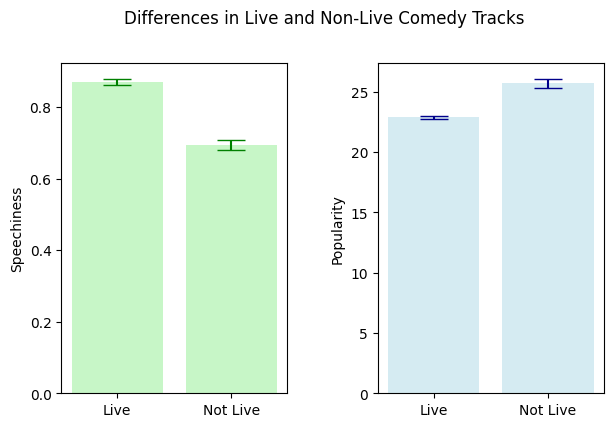

In [561]:
#Define means and errors for barplot
live_popularity_mean = group5["popularity"].mean()
nonlive_popularity_mean = group6["popularity"].mean()

live_popularity_error = group5["popularity"].sem()
nonlive_popularity_error = group6["popularity"].sem()

live_speechiness_mean = group5["speechiness"].mean()
nonlive_speechiness_mean = group6["speechiness"].mean()

live_speechiness_error = group5["speechiness"].sem()
nonlive_speechiness_error = group6["speechiness"].sem()

#Define x labels and coordinates for barplot
live_or_not = ['Live', 'Not Live']
x_pos = np.arange(len(live_or_not))

#group means and errors for use in barplot
speechiness_means = [live_speechiness_mean, nonlive_speechiness_mean]
speechiness_error = [live_speechiness_error, nonlive_speechiness_error]

popularity_means = [live_popularity_mean, nonlive_popularity_mean]
popularity_error = [live_popularity_error, nonlive_popularity_error]


#Define figure with one row and two columns

fig, (ax1, ax2) = plt.subplots(1, 2)
#Formatting figure
fig.set_figheight(3)
fig.set_figwidth(7)
fig.suptitle("Differences in Live and Non-Live Comedy Tracks")

fig.subplots_adjust(left=None, bottom=-.3, right=None, top=.8, wspace=.4, hspace=.4)

#1 Speechiness plot
ax1.bar(x_pos, speechiness_means, yerr=speechiness_error, align='center', alpha= 0.5, color = "lightgreen", ecolor='green', capsize=10)
ax1.set_ylabel('Speechiness')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(live_or_not)

#2 Popularity plot
ax2.bar(x_pos, popularity_means, yerr=popularity_error, align='center', alpha=0.5, color = "lightblue", ecolor='darkblue', capsize=10)
ax2.set_ylabel('Popularity')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(live_or_not)

plt.show()


Finally, are live tracks more likely to contain explicit lyrics? 

In [562]:
#Chi square to compare explicity and liveness- https://pythonfordatascienceorg.wordpress.com/chi-square-python/
from scipy.stats import chi2_contingency

In [563]:
#Crosstab to visualise 
crosstab = pd.crosstab(df["Live"], df["explicit"])
crosstab

explicit,False,True
Live,,
False,71940,6628
True,2446,330


In [564]:
#Chi square 
chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=40.397216793242734, pvalue=2.072361040200639e-10, dof=1, expected_freq=array([[71847.45338316,  6720.54661684],
       [ 2538.54661684,   237.45338316]]))

The chi square statistic is significant (p-value < .001), suggesting the two variables interact. Looking at the expected results above, we can see that live music was explicit fewer times than expected, and non-live music was explicit more times than expected. 